## Scipy FFTPack

#### One dimensional DFT

The FFT y[k] of length NN of the length-NN sequence x[n] is defined as

\begin{align}
y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x[n] \, ,
\end{align}
<br>

and the inverse transform is defined as follows
\begin{align}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y[k] \, .
\end{align}


In [ ]:
%matplotlib inline

In [ ]:
from scipy.fftpack import fft, ifft
import numpy as np

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y


In [ ]:
yinv = ifft(y)
yinv

For N even, the elements y[1]...y[N/2−1] contain the positive-frequency terms, and the elements y[N/2]...y[N−1] contain the negative-frequency terms, in order of decreasingly negative frequency. For N odd, the elements y[1]...y[(N−1)/2] contain the positive- frequency terms, and the elements y[(N+1)/2]...y[N−1] contain the negative- frequency terms, in order of decreasingly negative frequency.

In case the sequence x is real-valued, the values of y[n] for positive frequencies is the conjugate of the values y[n] for negative frequencies (because the spectrum is symmetric). Typically, only the FFT corresponding to positive frequencies is plotted.

In [ ]:
from scipy.fftpack import fft
N = 600
T = 1.0/800.0
x = np.linspace(0.0, N*T,N)
y = np.sin(50.0 * 2.0 * np.pi *x) + 0.5 * np.sin(80.0 * 2.0 * np.pi * x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N*np.abs(yf[0:N//2]))
plt.grid()
plt.show()

The FFT input signal is inherently truncated. This truncation can be modelled as multiplication of an infinite signal with a rectangular window function. In the spectral domain this multiplication becomes convolution of the signal spectrum with the window function spectrum, being of form \sin(x)/x. This convolution is the cause of an effect called spectral <b>leakage</b> (see [WPW]). Windowing the signal with a dedicated window function helps mitigate spectral leakage. The example below uses a Blackman window from scipy.signal and shows the effect of windowing (the zero component of the FFT has been truncated for illustrative purposes).

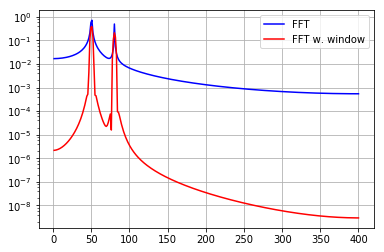

In [11]:
from scipy.fftpack import fft
N = 600 # number of sample points
T = 1.0/800.0 # sample spacing
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0 * np.pi * x) + 0.5 * np.sin(80.0 * 2.0 * np.pi * x)
yf = fft(y)

from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()



In case the sequence x is complex-valued, the spectrum is no longer symmetric. To simplify working with the FFT functions, scipy provicdes the flollowing two helper functions.
<br>The function <b>fftfreq</b> returns the FFT sample frequency points
<br>The function <b>fftshift</b> returns the swapping the lower and upper halves of a vector.

The example below plots the FFT of two complex exponentials; note the asymmetric spectrum.

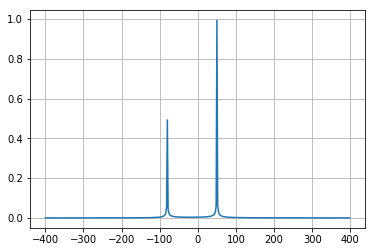

In [13]:
from scipy.fftpack import fft, fftfreq, fftshift
N = 400
T = 1.0/800.0
x = np.linspace(0.0, N*T, N)
y = np.exp(50.0 * 1.j * 2.0 * np.pi * x) + 0.5 * np.exp(-80.0 * 1.j * 2.0 * np.pi * x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

The function <b>rfft</b> calculates the FFT of a real sequence and outputs the FFT coefficients y[n] with separate real and imaginary parts. In case of N being even: [y[0], Re(y[1]), Im(y[1]),..., Re(y[N/2])]; in case N being odd [y[0], Re(y[1]),Im(y[1]),..., Re(y[N/2]),
Im(y[N/2])].

The corresponding function <b>irfft</b> calculates the IFFT of the FFT coefficients with this special ordering.

In [14]:
from scipy.fftpack import fft, rfft, irfft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])
fft(x)

array([ 5.50+0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.50+0.j        , -2.75+1.29903811j,  2.25+0.4330127j ])

In [19]:
yr = rfft(x)

In [20]:
irfft(yr)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [21]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
fft(x)

array([ 4.50000000+0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [22]:
rfft(x)

array([ 4.5       ,  2.08155948, -1.65109876, -1.83155948,  1.60822041])

#### Two and n-dimensional DFT

The functions <b>fft2, ifft2</b> provide 2-dimensional FFT and IFFT, respectively. Similar, <b>fftn, ifftn</b> provide n-dimensional FFT and IFFT respectively.
<br>
The example below demonstrates a 20dimensional IFFT and plots the resulting time-domain signals.

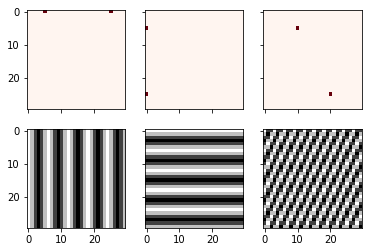

In [24]:
from scipy.fftpack import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
N= 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

### Discrete Cosine Transforms

Scipy provides a DCT with the function dct and a corresponding IDCT with the function idct. There are 8 types of the DCT [WPC], [Mak]; however, only the first 3 types are implemented in scipy. “The” DCT generally refers to DCT type 2, and “the” Inverse DCT generally refers to DCT type 3. In addition, the DCT coefficients can be normalized differently (for most types, scipy provides None and ortho). Two parameters of the dct/idct function calls allow setting the DCT type and coefficient normalization.

For a single dimension array x, dct(x, norm=’ortho’) is equal to MATLAB dct(x).



#### Type I DCT

Scipy uses the following definition of the unnormalized DCT-I (norm='None'):
\begin{align}
y[k] = x_0 + (-1)^k x_{N-1} + 2\sum_{n=1}^{N-2} x[n]
\cos\left({\pi nk\over N-1}\right),
\qquad 0 \le k < N.
\end{align}
Only None is supported as normalization mode for DCT-I. Note also that the DCT-I is only supported for input size > 1

#### Type II DCT

Scipy uses the following definition of the unnormalized DCT-II (norm='None'):
\begin{align}
y[k] = 2 \sum_{n=0}^{N-1} x[n] \cos \left({\pi(2n+1)k \over 2N} \right)
\qquad 0 \le k < N.
\end{align}
<br>
In case of the normalized DCT (norm='ortho'), the DCT coefficients y[k] are multiplied by a scaling factor f:
\begin{split}f = \begin{cases} \sqrt{1/(4N)}, & \text{if $k = 0$} \\    \sqrt{1/(2N)},
& \text{otherwise} \end{cases} \, .\end{split}

In this case, the DCT “base functions” 
\begin{align} 
\phi_k[n] = 2 f \cos \left({\pi(2n+1)k \over 2N} \right) 
\end{align} become orthonormal:
\begin{align}
\sum_{n=0}^{N-1} \phi_k[n] \phi_l[n] = \delta_{lk}
\end{align}

#### Type III DCT

Scipy uses the following definition of the unnormalized DCT-III (norm='None'):
\begin{align}
y[k] = x_0 + 2 \sum_{n=1}^{N-1} x[n] \cos\left({\pi n(2k+1) \over 2N}\right)
\qquad 0 \le k < N,
\end{align}
or, for norm='ortho':
\begin{align}
y[k] = {x_0\over\sqrt{N}} + {2\over\sqrt{N}} \sum_{n=1}^{N-1} x[n]
\cos\left({\pi n(2k+1) \over 2N}\right) \qquad 0 \le k < N.
\end{align}

The (unnormalized) DCT-III is the inverse of the (unnormalized) DCT-II, up to a factor 2N. The orthonormalized DCT-III is exactly the inverse of the orthonormalized DCT- II. The function idct performs the mappings between the DCT and IDCT types.

The example below shows the relation between DCT and IDCT for different types and normalizations.

In [25]:
from scipy.fftpack import dct, idct
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
dct(dct(x, type=2, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [26]:
idct(dct(x, type=2), type=2) # scaling factor 2 * N = 10

array([ 10.,  20.,  10., -10.,  15.])

In [28]:
idct(dct(x, type=3, norm='ortho'), type=3, norm='ortho') # no scaling

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [29]:
idct(dct(x, type=1), type = 1) # scaling factor 2*(N-1) = 8

array([  8.,  16.,   8.,  -8.,  12.])

The DCT exhibits the “energy compaction property”, meaning that for many signals only the first few DCT coefficients have significant magnitude. Zeroing out the other coefficients leads to a small reconstruction error, a fact which is exploited in lossy signal compression (e.g. JPEG compression).

The example below shows a signal x and two reconstructions (x20x20 and x15x15)from the signal’s DCT coefficients. The signal x20x20 is reconstructed from the first 20 DCT coefficients, x15x15 is reconstructed from the first 15 DCT coefficients. It can be seen that the relative error of using 20 coefficients is still very small (~0.1%), but provides a five-fold compression rate.

In [30]:
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
N = 100
t = np.linspace(0, 20, N)
x = np.exp(-t/3) * np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2)/sum(abs(x)**2)

0.0010901402257005154

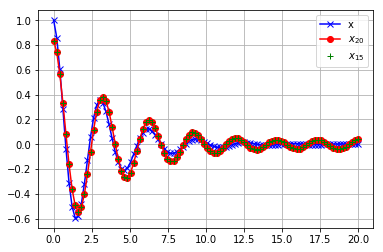

0.071881806500767961

In [33]:
plt.plot(t, x, '-bx')
plt.plot(t, yr, '-ro')
window = np.zeros(N)
window[:15] = 1
yr=idct(y*window, norm='ortho')
plt.plot(t,yr,'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()
sum(abs(x-yr)**2) / sum(abs(x)**2)
